In [1]:
import sys  
sys.path.insert(0, '/Users/franci/MasterThesis/multiomics-perturbation/new_model')

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Loss values

Compare loss values of SCVI RNA, TOTALVI and MMVAE for all three training scenarios

## Training scenario 1

## RNA correlations

In [2]:
from src_trainer.plotting import boxplot_grouped_corr, average_corr_mean_condition
import seaborn as sns

sample_dist_list = ["posterior", "prior", "transfer"]
col_conds = [{'PG': 'LD', 'ADJ': 'medium', 'CT': None}, 
             {'PG': 'DK', 'ADJ': 'medium', 'CT': None},
             {'PG': 'RT', 'ADJ': 'medium', 'CT': None},
             {'PG': 'LD', 'ADJ': 'PI', 'CT': None},
             {'PG': 'DK', 'ADJ': 'PI', 'CT': None},
             {'PG': 'RT', 'ADJ': 'PI', 'CT': None}]

folder_name = 'csv_1_RNA'

def average_corr_mean(folder, model_type, model_name, sample_dist_list, score = "corr_mean", modality="RNA"):
    """
    Calculates average correlation mean per sample distribution 
    :param filename: 
    :return: 
    """
    for sample_dist in sample_dist_list:
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        avg = np.mean(df[score])
        print("Average for {}: {}".format(sample_dist, np.round(avg,2)))
        

def all_boxplot_posterior_PS(cat_cov_model_dict, modality, label_models, score, title):
    data_list = []
    for cat_cov, model_dict in cat_cov_model_dict.items():
        print(model_dict)
        for i, (model_type, model_name) in enumerate(model_dict.items()):
            df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_1_RNA', model_type, model_name, 'posterior', modality))
            idx_list = []
            df["CAT_COV"] = cat_cov
            df["model_type"] = label_models[i]
            data_list.append(df[["CAT_COV", score, "model_type"]])
            
    dataframe = pd.concat(data_list)

    fig = plt.figure()
    sns.boxplot(y=score, x='CAT_COV',
                data=dataframe,
                palette="colorblind",
                hue='model_type')
    plt.title(title)
    plt.show()
    

def boxplot_posterior_PS(model_type_dict, modality, label_models, score, title):
    labels = []
    data_list = []
    for i, (model_type, model_name) in enumerate(model_type_dict.items()):
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_1_RNA', model_type, model_name, 'posterior', modality))
        idx_list = []
        labels.append(label_models[i])
        data_list.append(df[score])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(data_list, labels=labels)
    plt.title(title)
    plt.show()

Global seed set to 0


## Training scenario 1

### Categorical covariates: PG, ADJ, CT

In [3]:
model_type_dict = {"SCVI_RNA": "20220608-091026",
                   "TOTALVI": "20220608-104642", 
                   "MMVAE": "20220608-162535",
                   #"MMVAE_lp": "20220608-200506",
                  #"MMVI_CITESEQ": "20220603-125622"
                  }

Mean 


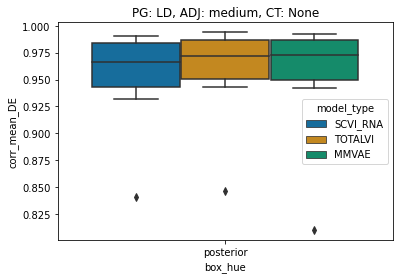

Var


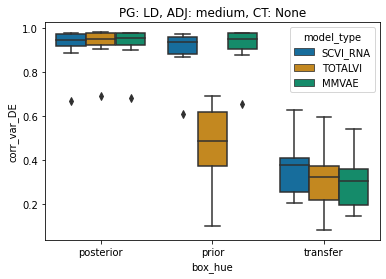

Mean 


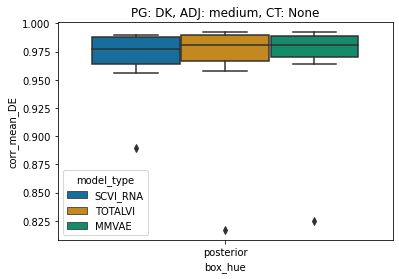

Var


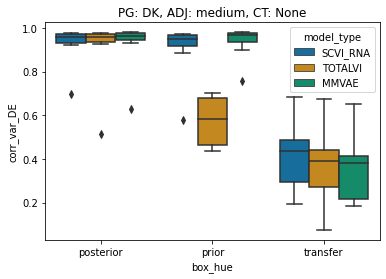

Mean 


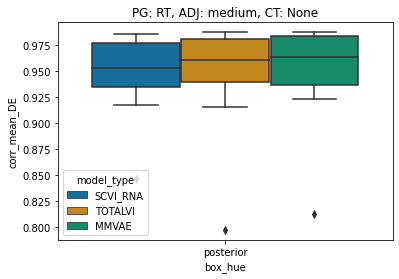

Var


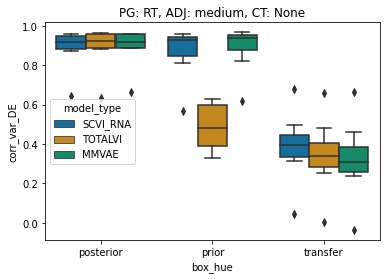

Mean 


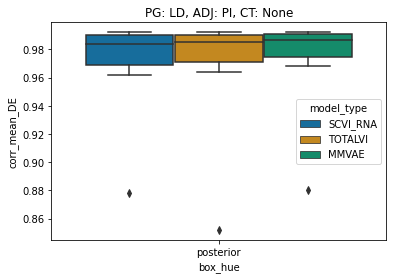

Var


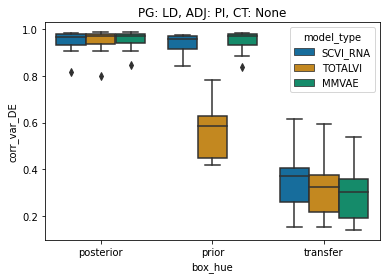

Mean 


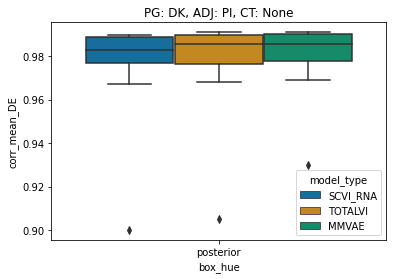

Var


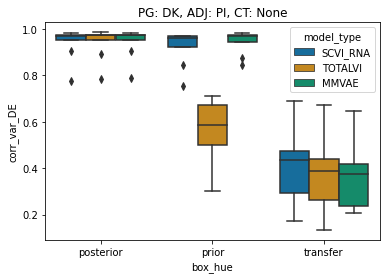

Mean 


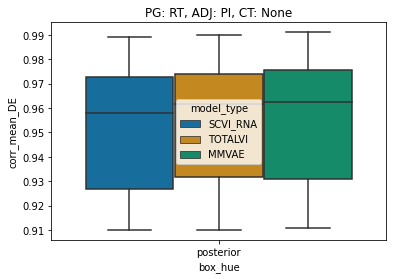

Var


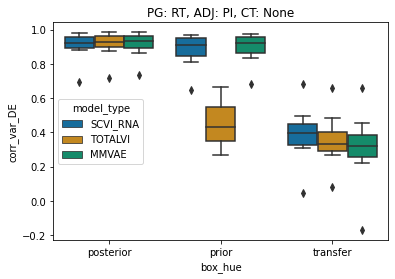

In [5]:
for d in col_conds:
    print("Mean ")
    boxplot_grouped_corr(model_type_dict,
                         ['posterior'],
                         d,
                         score="corr_mean_DE",
                         folder = "csv_1_RNA")
    print("Var")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var_DE",
                         folder = "csv_1_RNA")
    

In [6]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    results = average_corr_mean_condition("csv_1_RNA", 
                                        model_type, 
                                        model_name, 
                                        sample_dist_list, 
                                        condition='ADJ',
                                        score = "corr_mean_DE", 
                                        modality="RNA")
    print(results)
    results = average_corr_mean_condition("csv_1_RNA", 
                                        model_type, 
                                        model_name, 
                                        sample_dist_list, 
                                        condition='PG',
                                        score = "corr_mean_DE", 
                                        modality="RNA")
    print(results)
    results = average_corr_mean_condition("csv_1_RNA", 
                                        model_type, 
                                        model_name, 
                                        sample_dist_list, 
                                        condition='CT',
                                        score = "corr_mean_DE", 
                                        modality="RNA")
    print(results)

SCVI_RNA
   posterior  prior  transfer Condition
0       0.96   0.95       0.4        PI
1       0.95   0.94       0.4    medium
   posterior  prior  transfer Condition
0       0.97   0.96      0.42        DK
1       0.96   0.95      0.38        LD
2       0.95   0.92      0.40        RT
   posterior  prior  transfer Condition
0       0.96   0.95      0.31         B
1       0.99   0.98      0.51      CD4T
2       0.98   0.97      0.42      CD8T
3       0.95   0.91      0.47        DC
4       0.98   0.96      0.69  Monocyte
5       0.98   0.96      0.41        NK
6       0.96   0.94      0.29    OtherT
7       0.88   0.86      0.07  Platelet
TOTALVI
   posterior  prior  transfer Condition
0       0.97   0.55      0.36        PI
1       0.95   0.53      0.37    medium
   posterior  prior  transfer Condition
0       0.97   0.59      0.39        DK
1       0.96   0.54      0.34        LD
2       0.95   0.49      0.37        RT
   posterior  prior  transfer Condition
0       0.96   0.51    

In [12]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")

SCVI_RNA
corr_mean
Average for posterior: 0.93
Average for prior: 0.91
Average for transfer: 0.76
corr_var
Average for posterior: 0.91
Average for prior: 0.89
Average for transfer: 0.74
TOTALVI
corr_mean
Average for posterior: 0.93
Average for prior: 0.47
Average for transfer: 0.74
corr_var
Average for posterior: 0.91
Average for prior: 0.46
Average for transfer: 0.72
MMVAE
corr_mean
Average for posterior: 0.93
Average for prior: 0.92
Average for transfer: 0.73
corr_var
Average for posterior: 0.92
Average for prior: 0.9
Average for transfer: 0.71


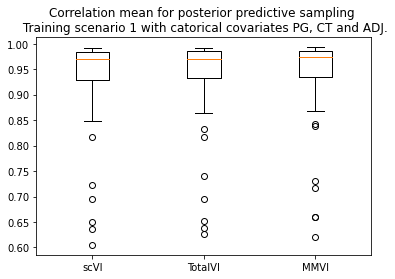

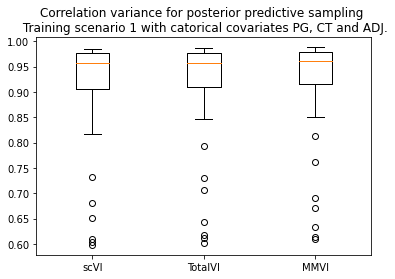

In [13]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG, CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_mean', title)
title = 'Correlation variance for posterior predictive sampling \n Training scenario 1 with catorical covariates PG, CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_var', title)

### Categorical covariates: PG, CT

In [14]:
model_type_dict = {"SCVI_RNA": "20220608-200506", 
                    "TOTALVI": "20220608-211318", 
                   "MMVAE": "20220610-121219"
                  }
folder_name = "csv_1_RNA"

All genes


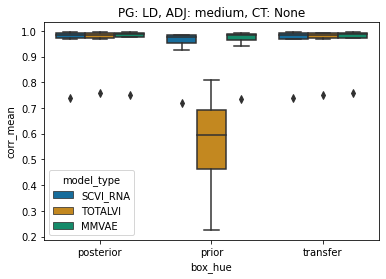

DE genes


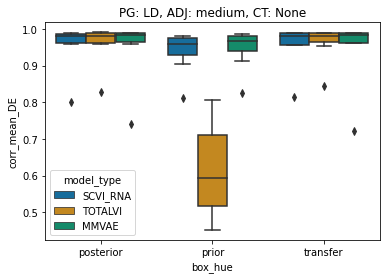

All genes


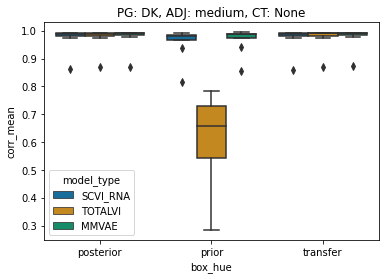

DE genes


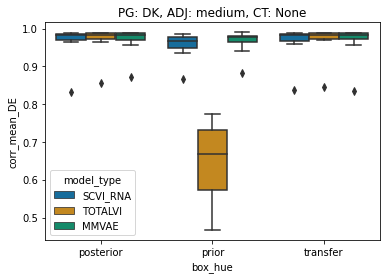

All genes


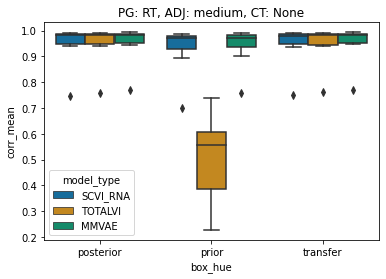

DE genes


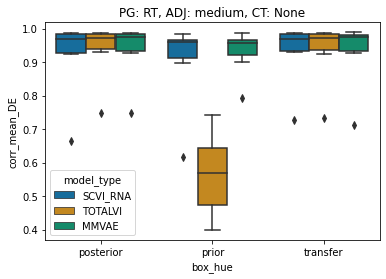

All genes


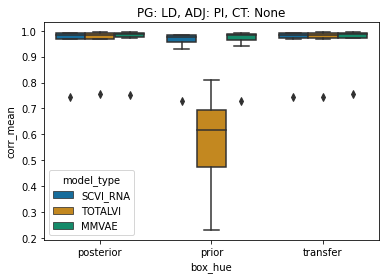

DE genes


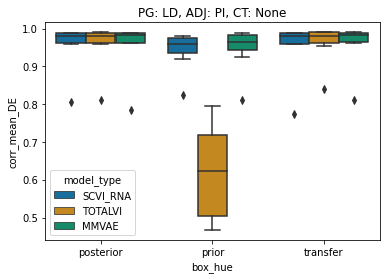

All genes


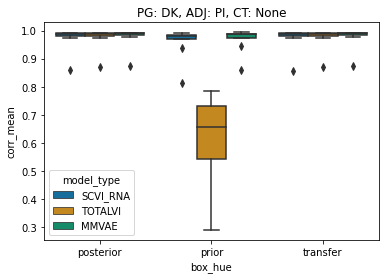

DE genes


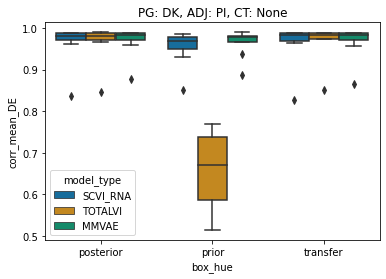

All genes


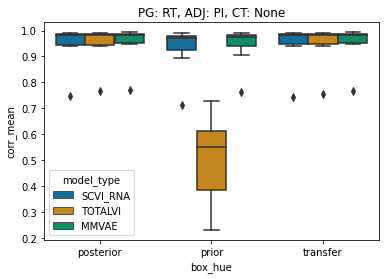

DE genes


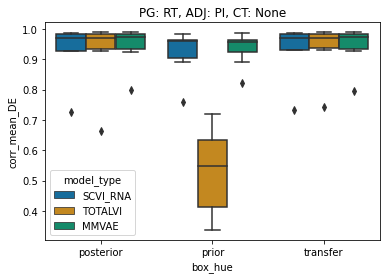

In [15]:
for d in col_conds:
    print("All genes")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name)
    print("DE genes")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean_DE",
                         folder = folder_name)
    

In [16]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    print("corr_mean")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, ['posterior','prior', 'transfer'], score = "corr_var")


SCVI_RNA
corr_mean
Average for posterior: 0.96
Average for prior: 0.94
Average for transfer: 0.96
corr_var
Average for posterior: 0.93
Average for prior: 0.92
Average for transfer: 0.93
TOTALVI
corr_mean
Average for posterior: 0.96
Average for prior: 0.56
Average for transfer: 0.96
corr_var
Average for posterior: 0.94
Average for prior: 0.56
Average for transfer: 0.94
MMVAE
corr_mean
Average for posterior: 0.96
Average for prior: 0.95
Average for transfer: 0.96
corr_var
Average for posterior: 0.94
Average for prior: 0.93
Average for transfer: 0.94


In [17]:
for cond in ['PG', 'CT']:
    results_dict = {}
    print(cond)
    for model_type, model_name in model_type_dict.items():
        print(model_type)
        results = average_corr_mean_condition("csv_1_RNA", 
                                            model_type, 
                                            model_name, 
                                            ['posterior', 'prior', 'transfer'],  
                                            condition=cond,
                                            score = "corr_mean", 
                                            modality="RNA")
        print(results)

PG
SCVI_RNA
   posterior  prior  transfer Condition
0       0.97   0.96      0.97        DK
1       0.95   0.94      0.95        LD
2       0.95   0.93      0.95        RT
TOTALVI
   posterior  prior  transfer Condition
0       0.97   0.61      0.97        DK
1       0.96   0.57      0.95        LD
2       0.95   0.51      0.95        RT
MMVAE
   posterior  prior  transfer Condition
0       0.97   0.97      0.97        DK
1       0.96   0.95      0.96        LD
2       0.95   0.94      0.95        RT
CT
SCVI_RNA
   posterior  prior  transfer Condition
0       0.98   0.97      0.98         B
1       0.99   0.99      0.99      CD4T
2       0.99   0.98      0.99      CD8T
3       0.96   0.92      0.96        DC
4       0.99   0.98      0.99  Monocyte
5       0.99   0.98      0.99        NK
6       0.97   0.96      0.97    OtherT
7       0.78   0.75      0.78  Platelet
TOTALVI
   posterior  prior  transfer Condition
0       0.98   0.56      0.98         B
1       0.99   0.78      0.99     

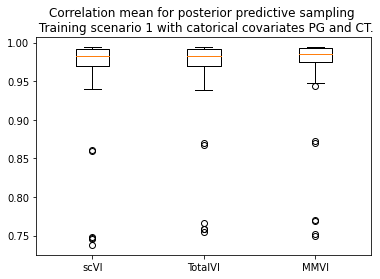

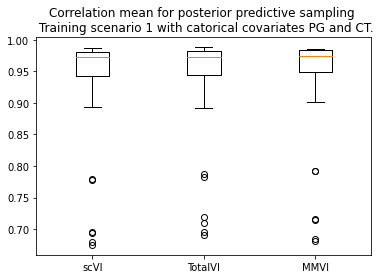

In [18]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and CT.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_mean', title)

title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and CT.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_var', title)

### Categorical covariates: PG, ADJ

In [19]:
model_type_dict = {"SCVI_RNA": "20220608-202750", 
                    "TOTALVI": "20220608-211318", 
                   "MMVAE": "20220610-131050"
                  }
folder_name = "csv_1_RNA"

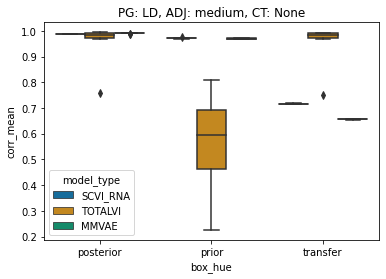

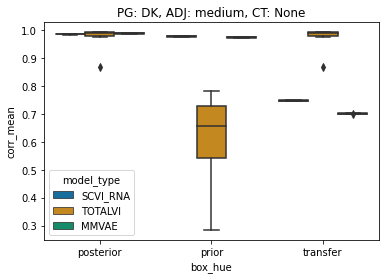

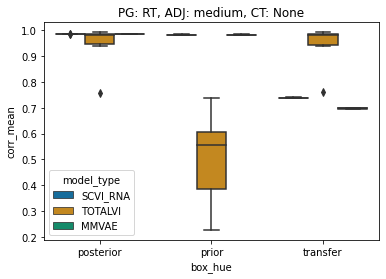

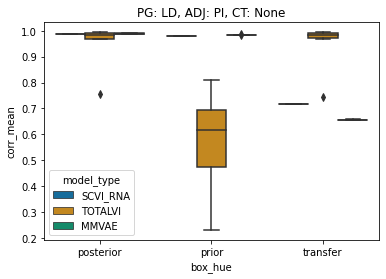

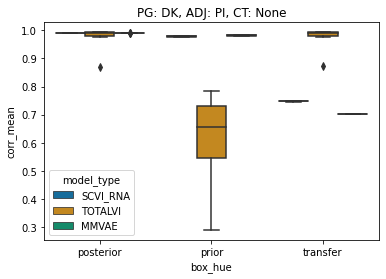

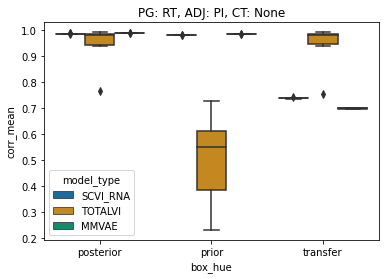

In [20]:
for d in col_conds:
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name)
    

In [21]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_var")

SCVI_RNA
Average for posterior: 0.99
Average for prior: 0.98
Average for transfer: 0.73
corr_var
Average for posterior: 0.95
Average for prior: 0.97
Average for transfer: 0.68
TOTALVI
Average for posterior: 0.96
Average for prior: 0.56
Average for transfer: 0.96
corr_var
Average for posterior: 0.94
Average for prior: 0.56
Average for transfer: 0.94
MMVAE
Average for posterior: 0.99
Average for prior: 0.98
Average for transfer: 0.69
corr_var
Average for posterior: 0.95
Average for prior: 0.97
Average for transfer: 0.63


In [22]:
for cond in ['PG', 'ADJ']:
    results_dict = {}
    print(cond)
    for model_type, model_name in model_type_dict.items():
        print(model_type)
        results = average_corr_mean_condition("csv_1_RNA", 
                                            model_type, 
                                            model_name, 
                                            ['posterior', 'prior', 'transfer'],  
                                            condition=cond,
                                            score = "corr_mean", 
                                            modality="RNA")
        print(results)

PG
SCVI_RNA
   posterior  prior  transfer Condition
0       0.99   0.98      0.75        DK
1       0.99   0.98      0.72        LD
2       0.99   0.98      0.74        RT
TOTALVI
   posterior  prior  transfer Condition
0       0.97   0.61      0.97        DK
1       0.96   0.57      0.95        LD
2       0.95   0.51      0.95        RT
MMVAE
   posterior  prior  transfer Condition
0       0.99   0.98      0.70        DK
1       0.99   0.98      0.66        LD
2       0.99   0.98      0.70        RT
ADJ
SCVI_RNA
   posterior  prior  transfer Condition
0       0.99   0.98      0.74        PI
1       0.99   0.98      0.73    medium
TOTALVI
   posterior  prior  transfer Condition
0       0.96   0.56      0.96        PI
1       0.96   0.56      0.96    medium
MMVAE
   posterior  prior  transfer Condition
0       0.99   0.98      0.69        PI
1       0.99   0.98      0.69    medium


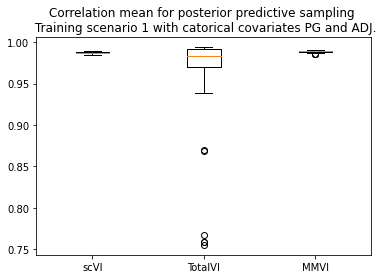

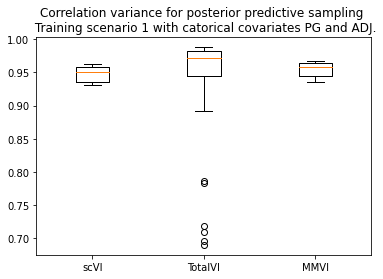

In [23]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and ADJ.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_mean', title)

title = 'Correlation variance for posterior predictive sampling \n Training scenario 1 with catorical covariates PG and ADJ.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_var', title)

### Categorical covariates: CT, ADJ

In [27]:
model_type_dict = {"SCVI_RNA": "20220608-205041", 
                   "TOTALVI": "20220608-220008", 
                   "MMVAE": "20220610-141006"
                  }
folder_name = 'csv_1_RNA'

In [28]:
for d in col_conds:
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name)
    

FileNotFoundError: [Errno 2] No such file or directory: '../results/csv_1_RNA/MMVAE_20220610-141006_posterior_RNA.csv'

In [26]:
for model_type, model_name in model_type_dict.items():
    print(model_type)
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_mean")
    print("corr_var")
    average_corr_mean(folder_name, model_type, model_name, sample_dist_list, score = "corr_var")

SCVI_RNA
Average for posterior: 0.97
Average for prior: 0.96
Average for transfer: 0.79
corr_var
Average for posterior: 0.95
Average for prior: 0.94
Average for transfer: 0.77
TOTALVI
Average for posterior: 0.97
Average for prior: 0.63


FileNotFoundError: [Errno 2] No such file or directory: '../results/csv_1_RNA/TOTALVI_20220608-220008_transfer_RNA.csv'

In [ ]:
for cond in ['ADJ', 'CT']:
    results_dict = {}
    print(cond)
    for model_type, model_name in model_type_dict.items():
        print(model_type)
        results = average_corr_mean_condition("csv_1_RNA", 
                                            model_type, 
                                            model_name, 
                                            ['posterior', 'prior', 'transfer'],  
                                            condition=cond,
                                            score = "corr_mean", 
                                            modality="RNA")
        print(results)

In [ ]:
# boxplot for correlation mean and variance 
label_models = ['scVI', 'TotalVI', 'MMVI']


title = 'Correlation mean for posterior predictive sampling \n Training scenario 1 with catorical covariates CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_mean', title)

title = 'Correlation variance for posterior predictive sampling \n Training scenario 1 with catorical covariates CT and ADJ.'
boxplot_posterior_PS(model_type_dict, 'RNA', label_models, 'corr_var', title)

## Posterior predictive sampling performance

In [57]:
complete_cat_cov_model_dict = {'PG_ADJ_CT': {"SCVI_RNA": "20220608-091026",
                                   "TOTALVI": "20220608-104642", 
                                   "MMVAE": "20220608-162535"
                                   },
                      'PG_CT': {"SCVI_RNA": "20220608-200506", 
                                "TOTALVI": "20220608-211318", 
                                "MMVAE": "20220610-121219"
                                },
                      'PG_ADJ': {"SCVI_RNA": "20220608-202750", 
                                 "TOTALVI": "20220608-211318", 
                                 "MMVAE": "20220610-131050"
                                  },
                      'CT_ADJ': {"SCVI_RNA": "20220608-205041", 
                                 "TOTALVI": "20220608-220008", 
                                 "MMVAE": "20220610-141006"}
                    }

{'SCVI_RNA': '20220608-091026', 'TOTALVI': '20220608-104642', 'MMVAE': '20220608-162535'}
{'SCVI_RNA': '20220608-200506', 'TOTALVI': '20220608-211318', 'MMVAE': '20220610-121219'}
{'SCVI_RNA': '20220608-202750', 'TOTALVI': '20220608-211318', 'MMVAE': '20220610-131050'}


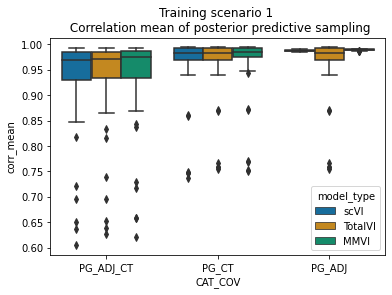

In [52]:
cat_cov_model_dict = {'PG_ADJ_CT': {"SCVI_RNA": "20220608-091026",
                                   "TOTALVI": "20220608-104642", 
                                   "MMVAE": "20220608-162535"
                                   },
                      'PG_CT': {"SCVI_RNA": "20220608-200506", 
                                "TOTALVI": "20220608-211318", 
                                "MMVAE": "20220610-121219"
                                },
                      'PG_ADJ': {"SCVI_RNA": "20220608-202750", 
                                 "TOTALVI": "20220608-211318", 
                                 "MMVAE": "20220610-131050"
                                  }
                    }


{'SCVI_RNA': '20220608-091026', 'TOTALVI': '20220608-104642', 'MMVAE': '20220608-162535'}
{'SCVI_RNA': '20220608-200506', 'TOTALVI': '20220608-211318', 'MMVAE': '20220610-121219'}
{'SCVI_RNA': '20220608-202750', 'TOTALVI': '20220608-211318', 'MMVAE': '20220610-131050'}
{'SCVI_RNA': '20220608-205041', 'TOTALVI': '20220608-220008', 'MMVAE': '20220610-141006'}


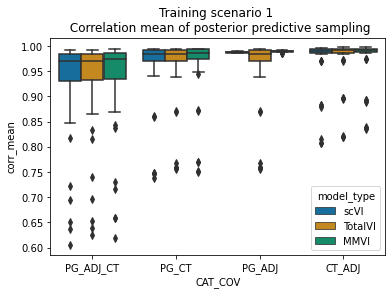

In [60]:
title = 'Training scenario 1 \n Correlation mean of posterior predictive sampling'
all_boxplot_posterior_PS(complete_cat_cov_model_dict, 'RNA', label_models, 'corr_mean', title)

{'SCVI_RNA': '20220608-091026', 'TOTALVI': '20220608-104642', 'MMVAE': '20220608-162535'}
{'SCVI_RNA': '20220608-200506', 'TOTALVI': '20220608-211318', 'MMVAE': '20220610-121219'}
{'SCVI_RNA': '20220608-202750', 'TOTALVI': '20220608-211318', 'MMVAE': '20220610-131050'}


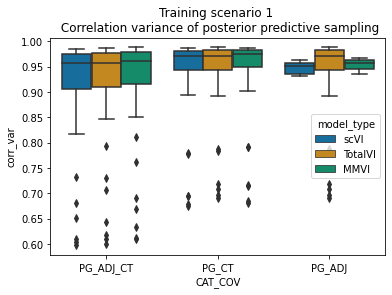

In [59]:
title = 'Training scenario 1 \n Correlation variance of posterior predictive sampling'
all_boxplot_posterior_PS(cat_cov_model_dict, 'RNA', label_models, 'corr_var', title)